#Susara Thenuwara -179418b

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

file = tf.keras.utils

dataframe = pd.read_csv(r'C:\Users\Susara\Documents\ANN\H1.csv' )
#dataframe.head()
dataframe.dtypes


IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                         int64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

In [13]:
train, test = train_test_split(dataframe, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

25638 train examples
6410 validation examples
8012 test examples


In [14]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  dataframe = dataframe.dropna()
  labels = dataframe.pop('ADR')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

batch_size = 5 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

for feature_batch, label_batch in train_ds.take(1):
    print('Every feature:', list(feature_batch.keys()))
    print('A batch of targets:', label_batch )



Every feature: ['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType', 'BookingChanges', 'DepositType', 'Agent', 'Company', 'DaysInWaitingList', 'CustomerType', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate']
A batch of targets: tf.Tensor([ 91.86 158.   115.    30.    65.  ], shape=(5,), dtype=float32)


In [6]:
feature_columns = []

# numeric cols
for header in ['LeadTime','Adults','Children','Babies','StaysInWeekendNights','StaysInWeekNights','BookingChanges','TotalOfSpecialRequests', 
               'RequiredCarParkingSpaces','PreviousBookingsNotCanceled','PreviousCancellations','ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth']:
  feature_columns.append(feature_column.numeric_column(header))

MarketSegment = feature_column.categorical_column_with_vocabulary_list(
      'MarketSegment', ['Direct', 'Corporate', 'Online TA', 'Offline TA/TO'])
MarketSegment_one_hot = feature_column.indicator_column(MarketSegment)
feature_columns.append(MarketSegment_one_hot)

MarketSegment_embedding = feature_column.embedding_column(MarketSegment, dimension=4)
feature_columns.append(MarketSegment_embedding)

CustomerType = feature_column.categorical_column_with_vocabulary_list(
      'CustomerType', ['Transient', 'Contract', 'Transient-Party'])
CustomerType_one_hot = feature_column.indicator_column(CustomerType)
feature_columns.append(CustomerType_one_hot)

CustomerType_embedding = feature_column.embedding_column(CustomerType, dimension=3)
feature_columns.append(CustomerType_embedding)

Meal = feature_column.categorical_column_with_vocabulary_list(
      'Meal', ['BB', 'FB', 'HB'])
Meal_one_hot = feature_column.indicator_column(Meal)
feature_columns.append(Meal_one_hot)

Meal_embedding = feature_column.embedding_column(Meal, dimension=3)
feature_columns.append(Meal_embedding)


ArrivalDateMonth = feature_column.categorical_column_with_vocabulary_list(
      'ArrivalDateMonth', ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ArrivalDateMonth_one_hot = feature_column.indicator_column(ArrivalDateMonth)
feature_columns.append(ArrivalDateMonth_one_hot)

ArrivalDateMonth_embedding = feature_column.embedding_column(ArrivalDateMonth, dimension=12)
feature_columns.append(ArrivalDateMonth_embedding)


ReservedRoomType = feature_column.categorical_column_with_vocabulary_list(
      'ReservedRoomType', ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])
ReservedRoomType_one_hot = feature_column.indicator_column(ReservedRoomType)
feature_columns.append(ReservedRoomType_one_hot)

ReservedRoomType_embedding = feature_column.embedding_column(ReservedRoomType, dimension=9)
feature_columns.append(ReservedRoomType_embedding)


AssignedRoomType = feature_column.categorical_column_with_vocabulary_list(
      'AssignedRoomType', ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])
AssignedRoomType_one_hot = feature_column.indicator_column(AssignedRoomType)
feature_columns.append(AssignedRoomType_one_hot)

AssignedRoomType_embedding = feature_column.embedding_column(AssignedRoomType, dimension=12)
feature_columns.append(AssignedRoomType_embedding)

DistributionChannel = feature_column.categorical_column_with_vocabulary_list(
      'DistributionChannel', ['Direct', 'Corporate', 'TA/TO'])
DistributionChannel_one_hot = feature_column.indicator_column(DistributionChannel)
feature_columns.append(DistributionChannel_one_hot)

DistributionChannel_embedding = feature_column.embedding_column(DistributionChannel, dimension=3)
feature_columns.append(DistributionChannel_embedding)



In [7]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)


In [8]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

Epoch 1/100
792/792 [==============================] - 36s 45ms/step - loss: 1648.3122 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
792/792 [==============================] - 17s 22ms/step - loss: 1138.5732 - accuracy: 0.0000e+00 - val_loss: 1047.8464 - val_accuracy: 0.0000e+00
Epoch 3/100
792/792 [==============================] - 18s 22ms/step - loss: 1076.8116 - accuracy: 0.0000e+00 - val_loss: 969.6437 - val_accuracy: 0.0000e+00
Epoch 4/100
792/792 [==============================] - 17s 22ms/step - loss: 1036.6790 - accuracy: 0.0000e+00 - val_loss: 942.3624 - val_accuracy: 0.0000e+00loss: 1026.1449 - accuracy: 0.0 - ETA: 2s - loss: 1
Epoch 5/100
792/792 [==============================] - 17s 22ms/step - loss: 1010.0178 - accuracy: 0.0000e+00 - val_loss: 932.2622 - val_accuracy: 0.0000e+00
Epoch 6/100
792/792 [==============================] - 18s 22ms/step - loss: 990.3941 - accuracy: 0.0000e+00 - val_loss: 912.4121 - val_accuracy: 0.0000e+00

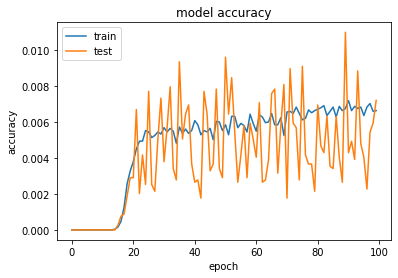

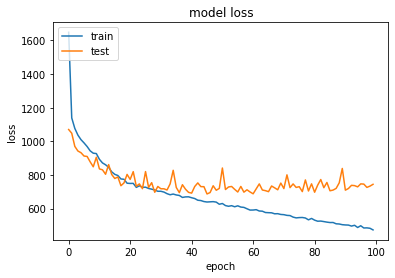

In [57]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=test_ds,epochs=100)
#_,train_acc = model.evaluate(train_ds, train, verbose=0)
#_,test_acc = model.evaluate(testX, test, verbose=0)

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/100
792/792 [==============================] - 35s 44ms/step - loss: 12816.6963 - accuracy: 0.0120 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+0002 - accuracy: 0 - 27s 35ms/step - loss: 12810.5891 - acc
Epoch 2/100
792/792 [==============================] - 19s 23ms/step - loss: 12669.2419 - accuracy: 0.0000e+00 - val_loss: 12595.2090 - val_accuracy: 0.0000e+00
Epoch 3/100
792/792 [==============================] - 18s 23ms/step - loss: 12519.7277 - accuracy: 0.0000e+00 - val_loss: 12449.4083 - val_accuracy: 0.0000e+00
Epoch 4/100
792/792 [==============================] - 18s 22ms/step - loss: 12374.3107 - accuracy: 0.0000e+00 - val_loss: 12304.8682 - val_accuracy: 0.0000e+00
Epoch 5/100
792/792 [==============================] - 18s 22ms/step - loss: 12228.4296 - accuracy: 0.0000e+00 - val_loss: 12161.9105 - val_accuracy: 0.0000e+00
Epoch 6/100
792/792 [==============================] - 18s 22ms/step - loss: 12083.4629 - accuracy: 0.0000e+00 - val_loss: 12020.2229 - val_ac

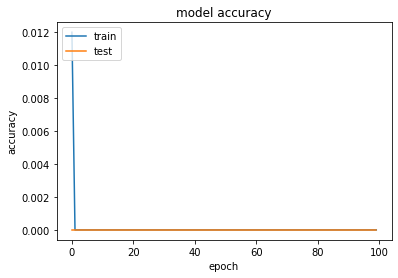

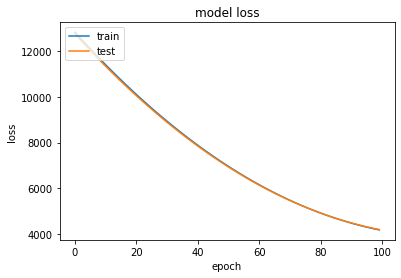

In [58]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu',  kernel_initializer= keras.initializers.Zeros()),
  layers.Dense(256, activation='relu'),
  layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=test_ds,epochs=100)
#_,train_acc = model.evaluate(train_ds, train, verbose=0)
#_,test_acc = model.evaluate(testX, test, verbose=0)

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
#weight zero initilizing
#This is not suitable for this dataset.  
#the first have the same values and symmetric features at the initialization.
#No variation or different features can learn this is not good procedure and not able to learn faster.
#All the hidden neurons have the symmetric feature. 

Epoch 1/100
792/792 [==============================] - 38s 48ms/step - loss: 1644.3189 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
792/792 [==============================] - 18s 22ms/step - loss: 1093.8732 - accuracy: 0.0000e+00 - val_loss: 1007.1560 - val_accuracy: 0.0000e+00
Epoch 3/100
792/792 [==============================] - 18s 22ms/step - loss: 1043.5665 - accuracy: 0.0000e+00 - val_loss: 967.1581 - val_accuracy: 0.0000e+00
Epoch 4/100
792/792 [==============================] - 18s 23ms/step - loss: 999.9648 - accuracy: 0.0000e+00 - val_loss: 926.1803 - val_accuracy: 0.0000e+00
Epoch 5/100
792/792 [==============================] - 18s 23ms/step - loss: 980.5720 - accuracy: 0.0000e+00 - val_loss: 1082.3630 - val_accuracy: 0.0000e+00
Epoch 6/100
792/792 [==============================] - 18s 23ms/step - loss: 956.3069 - accuracy: 0.0000e+00 - val_loss: 877.2003 - val_accuracy: 0.0000e+00
Epoch 7/100
792/792 [==============================

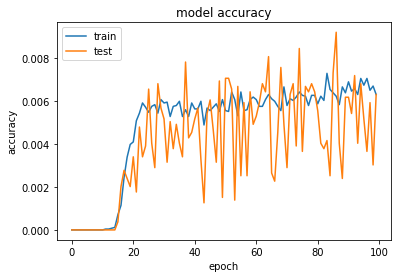

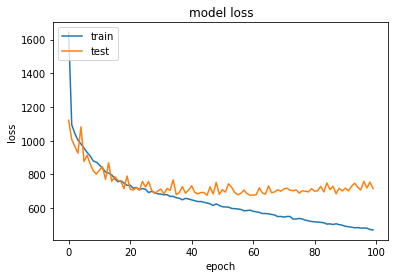

In [59]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu',  bias_initializer='zeros'),
  layers.Dense(256, activation='relu'),
  layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=test_ds,epochs=100)
#_,train_acc = model.evaluate(train_ds, train, verbose=0)
#_,test_acc = model.evaluate(testX, test, verbose=0)

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
#bia zero initialize
#This perfectly work as it increases the accuracy over the number of epochs and error decreased.

Epoch 1/100
792/792 [==============================] - 37s 47ms/step - loss: 1549.4212 - accuracy: 7.8942e-05 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
792/792 [==============================] - 19s 23ms/step - loss: 1092.4615 - accuracy: 0.0000e+00 - val_loss: 1190.5529 - val_accuracy: 0.0000e+00
Epoch 3/100
792/792 [==============================] - 18s 23ms/step - loss: 1054.6365 - accuracy: 0.0000e+00 - val_loss: 979.2091 - val_accuracy: 0.0000e+00
Epoch 4/100
792/792 [==============================] - 19s 24ms/step - loss: 1009.5344 - accuracy: 0.0000e+00 - val_loss: 1032.3430 - val_accuracy: 0.0000e+00
Epoch 5/100
792/792 [==============================] - 19s 24ms/step - loss: 975.9673 - accuracy: 0.0000e+00 - val_loss: 890.8580 - val_accuracy: 0.0000e+00
Epoch 6/100
792/792 [==============================] - 18s 23ms/step - loss: 950.0983 - accuracy: 0.0000e+00 - val_loss: 1014.2819 - val_accuracy: 0.0000e+00
Epoch 7/100
792/792 [============================

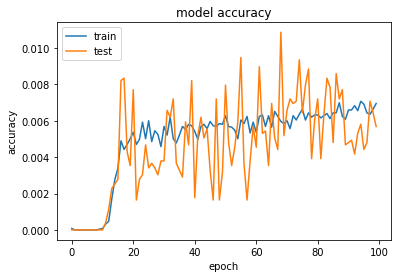

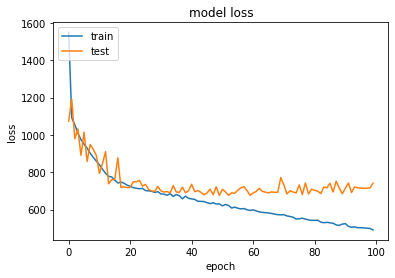

In [60]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu',   kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)),
  layers.Dense(256, activation='relu'),
  layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=test_ds,epochs=100)
#_,train_acc = model.evaluate(train_ds, train, verbose=0)
#_,test_acc = model.evaluate(testX, test, verbose=0)

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
#truncated normal initialization
#We define the standard devision 0.05 and this work perfectly. 
#It depends on weight values it initialized. Model accuracy increased over the number of epochs and error decreased.  
#We need to initialize the weight in same range but different. 


Epoch 1/100
792/792 [==============================] - 37s 46ms/step - loss: 1602.6811 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
792/792 [==============================] - 19s 24ms/step - loss: 1113.1656 - accuracy: 0.0000e+00 - val_loss: 970.3858 - val_accuracy: 0.0000e+00oss: 1157.4156 - accuracy: 0.0 - ETA: 7s - loss: 1156.0782 - acc - ETA: 6s - loss: 1134.4929 - accuracy: 0.000 - ETA: 5s - loss: 1149.437 - ETA: 3s - - ETA: 1s - loss: 1121.9364 - accuracy: 0.0000e+0 - ETA: 1s - loss: 1120.5073 - accuracy: 0. - ETA: 0s - loss: 1118.3710 - accuracy: 0.0000e - ETA: 0s - loss: 1114.0736 - accuracy: 0
Epoch 3/100
792/792 [==============================] - 19s 23ms/step - loss: 1043.4593 - accuracy: 0.0000e+00 - val_loss: 943.0412 - val_accuracy: 0.0000e+00: 23s - loss: 960.8236 - accuracy: 0.0000e - ETA:  - ETA: 14s  - ETA:  - ETA: 1s - loss: 1040.0536 - accuracy: 0 - ETA: 0s - loss: 1042.9562 - accuracy: 0.0
Epoch 4/100
792/792 [===============

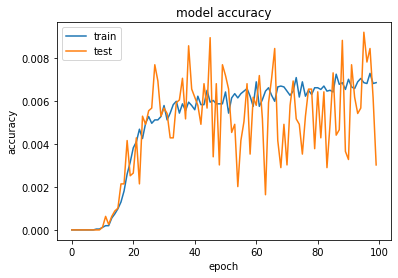

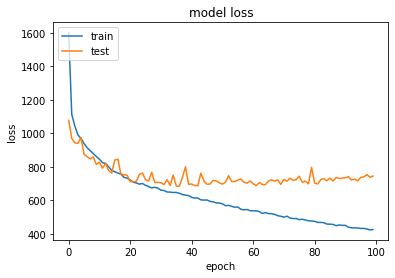

In [61]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu',   kernel_initializer=keras.initializers.he_normal(seed=None)),
  layers.Dense(256, activation='relu'),
  layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=test_ds,epochs=100)
#_,train_acc = model.evaluate(train_ds, train, verbose=0)
#_,test_acc = model.evaluate(testX, test, verbose=0)

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
#he initialization
#this also work perfectly rather than going to random truncated normal.
#Sigma based on the number of neurons in the previous layer. Model accuracy increased over the number of epochs and error decreased. 
#Sigma based on the number of neurons in the previous layer. Variance proportional to the number of neurons in the previous layer.
#It gives variation of weights as a function of hidden neuron in the previous layer. It gives minimum variance require t for the weight values to learn the features. 

Epoch 1/100
792/792 [==============================] - 37s 47ms/step - loss: 1582.0485 - accuracy: 7.8927e-05 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
792/792 [==============================] - 16s 20ms/step - loss: 1070.3985 - accuracy: 0.0000e+00 - val_loss: 1112.5702 - val_accuracy: 0.0000e+00: 1079.2988 - accuracy: 0.000 - ETA: 2s - l
Epoch 3/100
792/792 [==============================] - 16s 20ms/step - loss: 1035.1724 - accuracy: 0.0000e+00 - val_loss: 1036.6298 - val_accuracy: 0.0000e+00+0 - ETA: 1s - loss: 1032.595 - ETA: 0s - loss: 1039.1183 - accuracy: 0.0000
Epoch 4/100
792/792 [==============================] - 16s 20ms/step - loss: 984.2647 - accuracy: 0.0000e+00 - val_loss: 1013.3750 - val_accuracy: 0.0000e+00
Epoch 5/100
792/792 [==============================] - 16s 20ms/step - loss: 966.7187 - accuracy: 0.0000e+00 - val_loss: 972.7678 - val_accuracy: 0.0000e+0074.2199 - accuracy: 0.0000 - ETA: 1s - loss: 9 - ETA: 0s - loss: 971.1443 - 
Epoch 6/100


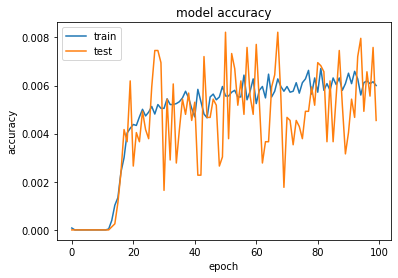

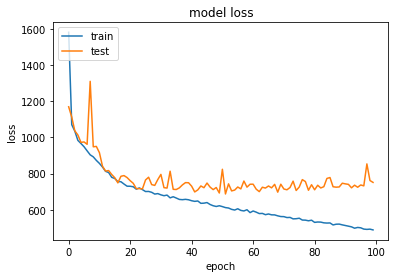

In [10]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu',   kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)),
  layers.Dense(256, activation='relu'),
  layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=test_ds,epochs=100)
#_,train_acc = model.evaluate(train_ds, train, verbose=0)
#_,test_acc = model.evaluate(testX, test, verbose=0)

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
#Weight random normal initialize
#Weights are initialized with normal distribution randomly. 
#Therefore, model work perfect but not perfect like truncated normal bcoz the weight initialization rage are larger. 
#Accuracy is less than truncated normal weight initializing 